## Hurst exponent

The Hurst exponent is a measure of the long-term memory of a time series. It quantifies the tendency of a time series to revert to its mean or cluster in one direction. The Hurst exponent shows if a time series behaves in a random, trending, or mean-reverting way. It captures the speed autocorrelation decrease as the lag increases.


Traders use it to pick the right trading strategy for the current market conditions. For example, you do not want to trade a trend strategy if the Hurst exponent shows mean reverting market behavior.

Use the Hurst exponent for strategy selection

The Hurst exponent ranges between 0 and 1.

- If the Hurst exponent is below 0.5, the market is mean reverting. Reversal strategies win in these markets.

- If the Hurst exponent of 0.5 means the market is random. In this case, a trading strategy that relies on the market direction will lose money.

- If the Hurst exponent is above 0.5 the market is trending. Markets with a high Hurst exponent are perfect for trend-following strategies.

Unfortunately, most traders will trade the same strategy through all markets. Use the Hurst exponent to pick the right strategy for the market.


1. Get stock price data
2. Calculate the Hurst exponent
3. Determine the type of market

Loading Daily data for ^GSPC with starting period 2000-01-03.

<AxesSubplot:title={'left':'S&P 500'}, xlabel='date'>

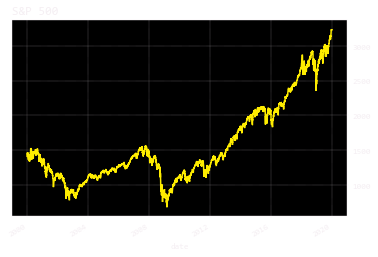

In [1]:
# Step 1: Get stock price data

# Start with the imports. I use the OpenBB SDK for data.

import pandas as pd
import numpy as np

from openbb_terminal.sdk import openbb
# Download 20 years of data and plot it.

df = openbb.stocks.load("^GSPC", start_date="2000-01-01", end_date="2019-12-31")["Adj Close"]

df.plot(title="S&P 500")

In [2]:
# Step 2: Calculate the Hurst exponent

# There are a few ways to calculate the Hurst exponent. You can estimate the rate of diffusion based on the variance of log prices in three lines of Python code.

def get_hurst_exponent(ts, max_lag=20):
    lags = range(2, max_lag)
    tau = [np.std(np.subtract(ts[lag:], ts[:-lag])) for lag in lags]

    return np.polyfit(np.log(lags), np.log(tau), 1)[0]

In [9]:
df

date
2000-01-03    1455.219971
2000-01-04    1399.420044
2000-01-05    1402.109985
2000-01-06    1403.449951
2000-01-07    1441.469971
                 ...     
2019-12-24    3223.379883
2019-12-26    3239.909912
2019-12-27    3240.020020
2019-12-30    3221.290039
2019-12-31    3230.780029
Name: Adj Close, Length: 5031, dtype: float64

In [3]:
# Step 3: Determine the type of market

# Take a look at how the lag parameter impacts the Hurst exponent.

for lag in [20, 100, 250, 500, 1000]:
    hurst_exp = get_hurst_exponent(df.values, lag)
    print(f"{lag} lags: {hurst_exp:.4f}")
# This will print the Hurst exponent at different lags. Over the entire time series, the S&P 500 is close to random. In the shorter lags, there is evidence of mean reversion.

# Now, zoom in on a specific period in time.

shorter_series = df.loc["2005":"2007"].values
for lag in [20, 100, 250, 500]:
    hurst_exp = get_hurst_exponent(shorter_series, lag)
    print(f"{lag} lags: {hurst_exp:.4f}")

20 lags: 0.4482
100 lags: 0.4515
250 lags: 0.4918
500 lags: 0.5265
1000 lags: 0.5178
20 lags: 0.3989
100 lags: 0.3215
250 lags: 0.2507
500 lags: 0.1258
